#### Lab 10

In [30]:
from keras.preprocessing.image import ImageDataGenerator

# Define the directories for the training, validation, and test sets
train_dir = "C:/Users/meenu/AIML/ML/Lab_10/train"
validation_dir = "C:/Users/meenu/AIML/ML/Lab_10/valid"
test_dir = "C:/Users/meenu/AIML/ML/Lab_10/test"


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)


batch_size = 32


train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150, 150),  
    batch_size=batch_size,
    class_mode='categorical'  
)


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150, 150),  
    batch_size=batch_size,
    class_mode='categorical'  
)


Found 744 images belonging to 3 classes.


Found 15 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [27]:
import os
import shutil
from keras.preprocessing.image import ImageDataGenerator


train_dir = "C:/Users/meenu/AIML/ML/Lab_10/train"
validation_dir = "C:/Users/meenu/AIML/ML/Lab_10/valid"
test_dir = "C:/Users/meenu/AIML/ML/Lab_10/test"

classes = os.listdir(train_dir)


class_image_counts = {}


for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_path))
    class_image_counts[class_name] = num_images


sorted_classes = sorted(class_image_counts, key=class_image_counts.get, reverse=True)


top_classes = sorted_classes[:3]
top_classes



In [29]:


train_dir = "C:/Users/meenu/AIML/ML/Lab_10/train"
validation_dir = "C:/Users/meenu/AIML/ML/Lab_10/valid"
test_dir = "C:/Users/meenu/AIML/ML/Lab_10/test"


def move_images_to_class_directories(source_dir, destination_dir, top_classes):
    classes = os.listdir(source_dir)
    for class_name in classes:
        if class_name in top_classes:
            class_path = os.path.join(source_dir, class_name)
            image_files = os.listdir(class_path)
            for image_file in image_files:
                src = os.path.join(class_path, image_file)
                dst = os.path.join(destination_dir, class_name, image_file)
                os.makedirs(os.path.join(destination_dir, class_name), exist_ok=True)
                shutil.move(src, dst)
    for class_name in classes:
        if class_name not in top_classes:
            class_path = os.path.join(source_dir, class_name)
            shutil.rmtree(class_path)


classes = os.listdir(train_dir)

class_image_counts = {}


for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_path))
    class_image_counts[class_name] = num_images


sorted_classes = sorted(class_image_counts, key=class_image_counts.get, reverse=True)

top_classes = sorted_classes[:3]


move_images_to_class_directories(train_dir, train_dir, top_classes)


move_images_to_class_directories(validation_dir, validation_dir, top_classes)


move_images_to_class_directories(test_dir, test_dir, top_classes)


In [31]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],  
    channel_shift_range=100.0,  
    vertical_flip=True, 
    featurewise_center=True,  
    featurewise_std_normalization=True, 
    zca_whitening=True  
)


c:\Users\meenu\AIML\ML\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\keras\preprocessing\image.py:1451: UserWarning: This ImageDataGenerator specifies `zca_whitening` which overrides setting of`featurewise_std_normalization`.
  warnings.warn(


In [33]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))


x = base_model.output
x = GlobalAveragePooling2D()(x)


x = Dense(256, activation='relu')(x)


predictions = Dense(3, activation='softmax')(x)


model = Model(inputs=base_model.input, outputs=predictions)


for layer in base_model.layers:
    layer.trainable = False


model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


model.summary()


Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0   

In [34]:
# Compile the model
model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model using the data generators
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)

c:\Users\meenu\AIML\ML\CSCN8010\venv\tensorflow_cpu\Lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


Epoch 1/10
24/24 [==============================] - 26s 1s/step - loss: 1.0528 - accuracy: 0.4785 - val_loss: 0.9352 - val_accuracy: 0.8000
Epoch 2/10
24/24 [==============================] - 22s 921ms/step - loss: 0.9129 - accuracy: 0.7352 - val_loss: 0.7802 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 25s 1s/step - loss: 0.8119 - accuracy: 0.8091 - val_loss: 0.6542 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 25s 1s/step - loss: 0.7079 - accuracy: 0.8548 - val_loss: 0.5347 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 25s 1s/step - loss: 0.6268 - accuracy: 0.8723 - val_loss: 0.4618 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 25s 1s/step - loss: 0.5708 - accuracy: 0.8710 - val_loss: 0.3955 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 25s 1s/step - loss: 0.5151 - accuracy: 0.8925 - val_loss: 0.3503 - val_accuracy: 1.0000
Epoch 8/10
24/24 

In [35]:

test_loss, test_accuracy = model.evaluate(test_generator)
print(f'Test accuracy: {test_accuracy}')

1/1 [==============================] - 1s 638ms/step - loss: 0.2194 - accuracy: 1.0000
Test accuracy: 1.0


In [44]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve,precision_recall_fscore_support,f1_score


# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=len(test_generator))
print("Test Accuracy:", test_accuracy)


Y_test = test_generator.classes
Y_pred = model.predict(test_generator, steps=len(test_generator))
y_pred = np.argmax(Y_pred, axis=1)

# Generate and print the classification report
print(classification_report(Y_test, y_pred, target_names=test_generator.class_indices))

# Generate and print the confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)



1/1 [==============================] - 1s 539ms/step - loss: 0.2848 - accuracy: 1.0000
Test Accuracy: 1.0
1/1 [==============================] - 1s 592ms/step
                  precision    recall  f1-score   support

D-ARNAUDS BARBET       0.20      0.20      0.20         5
     HOUSE FINCH       0.40      0.40      0.40         5
    RUFOUS TREPE       0.20      0.20      0.20         5

        accuracy                           0.27        15
       macro avg       0.27      0.27      0.27        15
    weighted avg       0.27      0.27      0.27        15

Confusion Matrix:
[[1 1 3]
 [2 2 1]
 [2 2 1]]


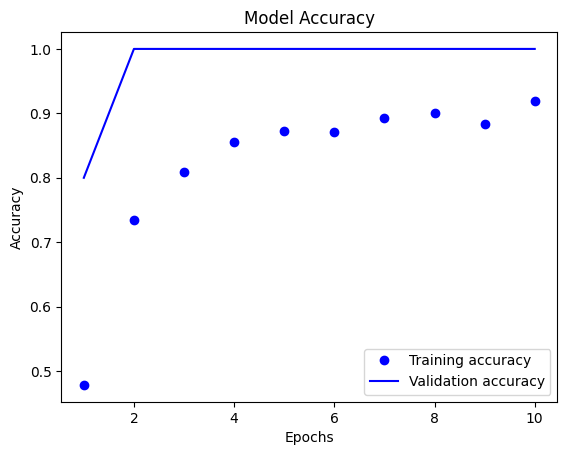

In [40]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

epochs = range(1, len(training_accuracy) + 1)
plt.plot(epochs, training_accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, validation_accuracy, 'b', label='Validation accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


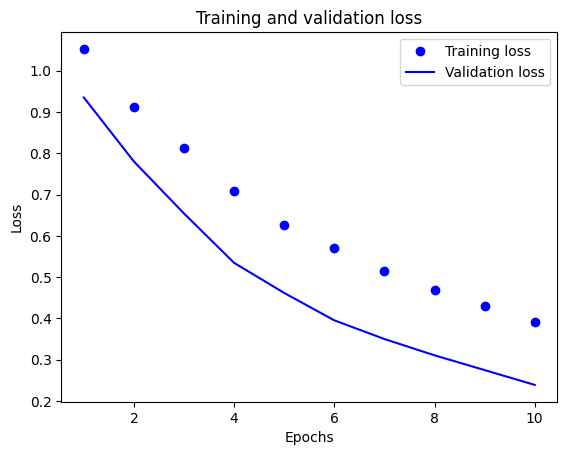

In [41]:

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs = range(1, len(training_loss) + 1)
plt.plot(epochs, training_loss, 'bo', label='Training loss')
plt.plot(epochs, validation_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


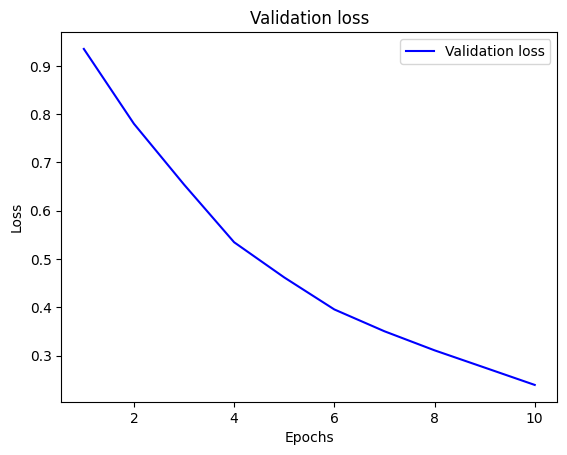

In [42]:

validation_loss = history.history['val_loss']

# Plot the validation loss values
epochs = range(1, len(validation_loss) + 1)
plt.plot(epochs, validation_loss, label='Validation loss', color='b')
plt.title('Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [59]:


true_binary_labels = []
for cls in Y_test:
    binary_label = np.zeros_like(Y_test)
    binary_label[cls] = 1
    true_binary_labels.append(binary_label)

true_binary_labels = np.array(true_binary_labels)


In [63]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC for each class
auc_scores = []
for i in range(len(top_classes)):
    auc = roc_auc_score(true_binary_labels[:, i], Y_pred[:, i])
    auc_scores.append(auc)
    print("AUC for {}: {}".format(top_classes[i], auc_scores[i]))




AUC for RUFOUS TREPE: 0.34
AUC for HOUSE FINCH: 0.42
AUC for D-ARNAUDS BARBET: 0.44000000000000006


*  RUFOUS TREPE: AUC score of 0.34 indicates relatively weaker model performance in identifying RUFOUS TREPE instances.

*  HOUSE FINCH: AUC score of 0.42 suggests room for improvement in the model's HOUSE FINCH classification performance.

*  D-ARNAUDS BARBET: AUC score of 0.44 reflects the model's effectiveness in distinguishing D-ARNAUDS BARBET instances, but there is potential for enhancement.